# Windjammer Analysis

This notebook analyzes the impact of Windjammer events on sales data.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Loading and Preparation

In [3]:
# Daten einlesen
umsatz_df = pd.read_csv('umsatzdaten_gekuerzt.csv')
windjammer_df = pd.read_csv('windjammer.csv')

# Datum zu datetime konvertieren
umsatz_df['Datum'] = pd.to_datetime(umsatz_df['Datum'])
windjammer_df['Datum'] = pd.to_datetime(windjammer_df['Datum'])

# Wochentag hinzufügen (0 = Montag, 6 = Sonntag)
umsatz_df['Wochentag'] = umsatz_df['Datum'].dt.dayofweek

# Windjammerparade-Flag hinzufügen
umsatz_df['Windjammerparade'] = umsatz_df['Datum'].isin(windjammer_df['Datum']).astype(int)

## 1. Vergleich: Allgemeiner Umsatz vs. Umsatz bei Windjammerparade

In [4]:
print("Allgemeiner Umsatz:")
print(umsatz_df[umsatz_df['Windjammerparade'] == 0]['Umsatz'].describe())
print("\nUmsatz an Windjammerparade-Tagen:")
print(umsatz_df[umsatz_df['Windjammerparade'] == 1]['Umsatz'].describe())

Allgemeiner Umsatz:
count    9309.000000
mean      206.317732
std       143.969018
min         7.051201
25%        96.847762
50%       161.676202
75%       280.107586
max      1879.461831
Name: Umsatz, dtype: float64

Umsatz an Windjammerparade-Tagen:
count     25.000000
mean     367.352722
std      243.504143
min       49.884049
25%      169.797038
50%      339.700511
75%      498.133552
max      861.858617
Name: Umsatz, dtype: float64


## 2. Vergleich: Samstage ohne Parade vs. Samstage mit Parade

In [5]:
samstage_df = umsatz_df[umsatz_df['Wochentag'] == 5]  # 5 = Samstag
print("Umsatz an normalen Samstagen:")
print(samstage_df[samstage_df['Windjammerparade'] == 0]['Umsatz'].describe())
print("\nUmsatz an Windjammerparade-Samstagen:")
print(samstage_df[samstage_df['Windjammerparade'] == 1]['Umsatz'].describe())

Umsatz an normalen Samstagen:
count    1311.000000
mean      238.916510
std       164.366696
min        18.574458
25%       111.076118
50%       194.365188
75%       325.881820
max      1705.144205
Name: Umsatz, dtype: float64

Umsatz an Windjammerparade-Samstagen:
count     25.000000
mean     367.352722
std      243.504143
min       49.884049
25%      169.797038
50%      339.700511
75%      498.133552
max      861.858617
Name: Umsatz, dtype: float64


## Visualisierung

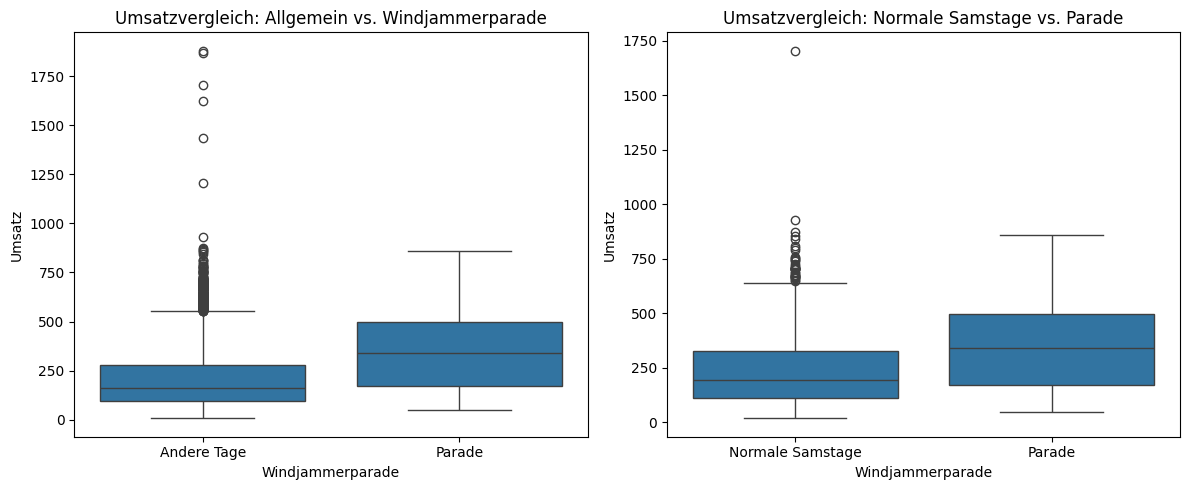

In [6]:
plt.figure(figsize=(12, 5))

# Box-Plot: Allgemeiner Vergleich
plt.subplot(1, 2, 1)
sns.boxplot(data=umsatz_df, x='Windjammerparade', y='Umsatz')
plt.title('Umsatzvergleich: Allgemein vs. Windjammerparade')
plt.xlabel('Windjammerparade')
plt.xticks([0, 1], ['Andere Tage', 'Parade'])

# Box-Plot: Samstags-Vergleich
plt.subplot(1, 2, 2)
sns.boxplot(data=samstage_df, x='Windjammerparade', y='Umsatz')
plt.title('Umsatzvergleich: Normale Samstage vs. Parade')
plt.xlabel('Windjammerparade')
plt.xticks([0, 1], ['Normale Samstage', 'Parade'])

plt.tight_layout()
plt.show()

## Prozentuale Unterschiede

In [7]:
# Prozentuale Unterschiede berechnen
avg_normal = umsatz_df[umsatz_df['Windjammerparade'] == 0]['Umsatz'].mean()
avg_parade = umsatz_df[umsatz_df['Windjammerparade'] == 1]['Umsatz'].mean()
avg_normal_samstag = samstage_df[samstage_df['Windjammerparade'] == 0]['Umsatz'].mean()
avg_parade_samstag = samstage_df[samstage_df['Windjammerparade'] == 1]['Umsatz'].mean()

print(f"Prozentuale Unterschiede:")
print(f"Parade vs. normale Tage: {((avg_parade / avg_normal) - 1) * 100:.1f}% mehr Umsatz")
print(f"Parade vs. normale Samstage: {((avg_parade_samstag / avg_normal_samstag) - 1) * 100:.1f}% mehr Umsatz")

Prozentuale Unterschiede:
Parade vs. normale Tage: 78.1% mehr Umsatz
Parade vs. normale Samstage: 53.8% mehr Umsatz
